IMPORTAMOS LAS VARIABLES QUE VAMOS A USAR

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import tensorflow as tf


LEEMOS CSV

In [208]:
dtafile = 'datatfg.csv'
df = pd.read_csv(dtafile, encoding='ISO-8859-1',on_bad_lines='skip',header = 0)

In [209]:
seguido1 = np.arange(6,9,1)
seguido2 = np.arange(10,16,1)
seguido3 = np.arange(18,31,1)
seguido4 = np.arange(32,40,1)
seguido5 = np.arange(46,51,1)
seguido6 = np.arange(66,73,1)
seguido7 = np.arange(81,88,1)
seguido8 = np.arange(90,95,1)
seguido9 = np.arange(98,102,1)
seguido10 = np.arange(120,123,1)
seguido11 = np.arange(130,144,1)
seguido12 = np.arange(246,265,1)
seguido13 = np.arange(320,376,1)
seguido14 = np.arange(381,396,1)
seguido15 = np.arange(411,452,1)
c = np.concatenate((seguido1,seguido2,seguido3,seguido4,[43],seguido5,seguido6,[74],[78],[79],seguido7,seguido8,seguido9,[106],[107],[108],[118],seguido10,seguido11,seguido12,[296],[313],seguido13,seguido14,seguido15))

NOS QUEDAMOS CON LAS VARIABLES QUE NOS INTERESAN

In [210]:
df_depurado = df.iloc[:,c]

ELIMINAMOS PACIENTES CON VARIABLE EXITUS == 2

In [211]:
df = df_depurado
df = df[df.exitus != 2]

In [212]:
df['ictus'].value_counts()
75+17+5+18

115

In [213]:
num_muertos = sum(df.loc[:,'exitus']==1)
num_eventtrombo = sum(df.loc[:,'tep']==1) + sum(df.loc[:,'tvp']==1) + sum(df.loc[:,'sca']==1) + sum(df.loc[:,'ictus']==1)
print("Número pacientes muertos:",num_muertos)
print("Eventos trombos:",num_eventtrombo)
df['trombo'] = (df.loc[:,'tep']==1) | (df.loc[:,'tvp']==1) | (df.loc[:,'sca']==1) | (df.loc[:,'ictus']==1)


Número pacientes muertos: 626
Eventos trombos: 115


/var/folders/c6/n52lpdx173scrtd7wybk2_xh0000gn/T/ipykernel_10812/3666351503.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trombo'] = (df.loc[:,'tep']==1) | (df.loc[:,'tvp']==1) | (df.loc[:,'sca']==1) | (df.loc[:,'ictus']==1)


eventos trombo(n=115) = TEP, TVP, SCA, ICTUS

In [214]:

df_trombo = df.query('trombo==1')
df_no_trombo = df.query('tep==0 and tvp==0 and sca==0 and ictus==0')


Calculamos algunos datos preliminares de df

In [215]:
mean_age = df["edad"].mean()
print("EDAD MEDIA =", mean_age)

#num_rows = df.count()
#print("Pacientes sin NaN =", num_rows)

num_rows2 = df.shape[0]
print("Pacientes total =", num_rows2)

num_valores_sexo_1 = df['sexo'].value_counts()[1]
print("Hombres = ",num_valores_sexo_1,num_valores_sexo_1*100/num_rows2)

tabaco = df['tabaco'].value_counts()[1]
print("tabaco =", tabaco,tabaco*100/num_rows2)

cancer = df['cancer'].value_counts()[1]
print("cancer =", cancer,cancer*100/num_rows2)

exitus = df['exitus'].value_counts()[1]
print("muertos =", exitus,exitus*100/num_rows2)

EDAD MEDIA = 62.201610022059135
Pacientes total = 3064
Hombres =  1680 54.83028720626632
tabaco = 301 9.823759791122715
cancer = 301 9.823759791122715
muertos = 626 20.430809399477805


Calculamos algunos datos preliminares de df_trombo

In [216]:
mean_age = df_trombo["edad"].mean()
print("EDAD MEDIA =", mean_age)

#num_rows = df.count()
#print("Pacientes sin NaN =", num_rows)

num_rows2 = df_trombo.shape[0]
print("Pacientes total =", num_rows2)

num_valores_sexo_1 = df_trombo['sexo'].value_counts()[1]
print("Hombres = ",num_valores_sexo_1,num_valores_sexo_1*100/num_rows2)

tabaco = df_trombo['tabaco'].value_counts()[1]
print("tabaco =", tabaco,tabaco*100/num_rows2)

cancer = df_trombo['cancer'].value_counts()[1]
print("cancer =", cancer,cancer*100/num_rows2)

exitus = df_trombo['exitus'].value_counts()[1]
print("muertos =", exitus,exitus*100/num_rows2)

EDAD MEDIA = 67.233125214183
Pacientes total = 109
Hombres =  70 64.22018348623853
tabaco = 11 10.091743119266056
cancer = 13 11.926605504587156
muertos = 42 38.53211009174312


Calculamos algunos datos preliminares de df_no_trombo

In [217]:
mean_age = df_no_trombo["edad"].mean()
print("EDAD MEDIA =", mean_age)

#num_rows = df.count()
#print("Pacientes sin NaN =", num_rows)

num_rows2 = df_no_trombo.shape[0]
print("Pacientes total =", num_rows2)

num_valores_sexo_1 = df_no_trombo['sexo'].value_counts()[1]
print("Hombres = ",num_valores_sexo_1,num_valores_sexo_1*100/num_rows2)

tabaco = df_no_trombo['tabaco'].value_counts()[1]
print("tabaco =", tabaco,tabaco*100/num_rows2)

cancer = df_no_trombo['cancer'].value_counts()[1]
print("cancer =", cancer,cancer*100/num_rows2)

exitus = df_no_trombo['exitus'].value_counts()[1]
print("muertos =", exitus,exitus*100/num_rows2)

EDAD MEDIA = 62.016014368610236
Pacientes total = 2955
Hombres =  1610 54.4839255499154
tabaco = 290 9.813874788494077
cancer = 288 9.746192893401016
muertos = 584 19.76311336717428


Analisis muertos

In [218]:
df_muerto = df.query('exitus==1')
df_no_muerto = df.query('exitus==0')

Calculamos algunos datos preliminares de df_muerto

In [219]:
mean_age = df_muerto["edad"].mean()
print("EDAD MEDIA =", mean_age)

#num_rows = df.count()
#print("Pacientes sin NaN =", num_rows)

num_rows2 = df_muerto.shape[0]
print("Pacientes total =", num_rows2)

num_valores_sexo_1 = df_muerto['sexo'].value_counts()[1]
print("Hombres = ",num_valores_sexo_1,num_valores_sexo_1*100/num_rows2)

tabaco = df_muerto['tabaco'].value_counts()[1]
print("tabaco =", tabaco,tabaco*100/num_rows2)

cancer = df_muerto['cancer'].value_counts()[1]
print("cancer =", cancer,cancer*100/num_rows2)

exitus = df_muerto['exitus'].value_counts()[1]
print("muertos =", exitus,exitus*100/num_rows2)

EDAD MEDIA = 80.4536565611252
Pacientes total = 626
Hombres =  396 63.25878594249201
tabaco = 79 12.619808306709265
cancer = 111 17.731629392971247
muertos = 626 100.0


Calculamos algunos datos preliminares de df_no_muerto

In [220]:
mean_age = df_no_muerto["edad"].mean()
print("EDAD MEDIA =", mean_age)

#num_rows = df.count()
#print("Pacientes sin NaN =", num_rows)

num_rows2 = df_no_muerto.shape[0]
print("Pacientes total =", num_rows2)

num_valores_sexo_1 = df_no_muerto['sexo'].value_counts()[1]
print("Hombres = ",num_valores_sexo_1,num_valores_sexo_1*100/num_rows2)

tabaco = df_no_muerto['tabaco'].value_counts()[1]
print("tabaco =", tabaco,tabaco*100/num_rows2)

cancer = df_no_muerto['cancer'].value_counts()[1]
print("cancer =", cancer,cancer*100/num_rows2)



EDAD MEDIA = 57.60038374620644
Pacientes total = 2416
Hombres =  1274 52.7317880794702
tabaco = 219 9.064569536423841
cancer = 189 7.822847682119205


In [221]:
nombres = df.columns
df_sinnan=df
for nombre in nombres:
  nan_count = df[nombre].isnull().sum()
  if nan_count>50:
    df_sinnan = df_sinnan.drop(columns=nombre)

Modelo regresión lineal

In [206]:
df_m1 = df_sinnan.dropna(subset=['edad', 'sexo', 'tabaco','exitus'])
# seleccionar las columnas que quiero usar como variables de entrada y como variable objetivo
X = df_m1[['edad', 'sexo', 'tabaco']]
y = df_m1['exitus']

# dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# crear el modelo de regresión lineal
model = LinearRegression()

# entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# evaluar el modelo
r2_score = model.score(X_test, y_test)
print(f'Coeficiente de determinación (R^2): {r2_score}')


Coeficiente de determinación (R^2): 0.17033120569105165


M1 RNA

In [261]:
df_m2 = df_sinnan.dropna(subset=['edad', 'sexo', 'tabaco','exitus'])
# seleccionar las columnas que quiero usar como variables de entrada y como variable objetivo
X = df_m2[['edad', 'sexo', 'tabaco']]
y = df_m2['exitus']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Definimos el modelo
model = Sequential()
model.add(Dense(2, input_dim=3, activation='relu'))
model.add(Dense(1, activation='softmax'))

# Compilamos el modelo, especificando la función de pérdida y el optimizador
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo utilizando los datos de entrada y salida
history = model.fit(X_train, y_train,validation_split=0.2,epochs=50, batch_size=10)


Epoch 1/50
195/195 [==============================] - 2s 3ms/step - loss: 0.5803 - accuracy: 0.2081 - val_loss: 0.5424 - val_accuracy: 0.1992
Epoch 2/50
195/195 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.2081 - val_loss: 0.4888 - val_accuracy: 0.1992
Epoch 3/50
195/195 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.2081 - val_loss: 0.4503 - val_accuracy: 0.1992
Epoch 4/50
195/195 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.2081 - val_loss: 0.4227 - val_accuracy: 0.1992
Epoch 5/50
195/195 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.2081 - val_loss: 0.4021 - val_accuracy: 0.1992
Epoch 6/50
195/195 [==============================] - 1s 3ms/step - loss: 0.4096 - accuracy: 0.2081 - val_loss: 0.3863 - val_accuracy: 0.1992
Epoch 7/50
195/195 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.2081 - val_loss: 0.3745 - val_accuracy: 0.1992
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


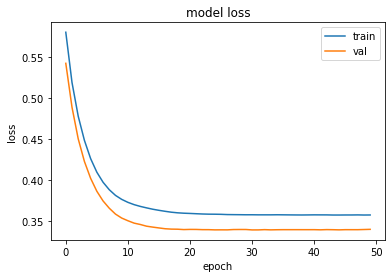

0.39311644434928894


In [262]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
# Evaluar el modelo en el conjunto de prueba
results = model.evaluate(X_test, y_test, verbose=0)[0]
print(results)

M2

In [265]:
df_m2 = df_sinnan.dropna(subset=['edad', 'sexo', 'tabaco','exitus','trombo'])
# seleccionar las columnas que quiero usar como variables de entrada y como variable objetivo
X = df_m2[['edad', 'sexo', 'tabaco','trombo']]
y = df_m2['exitus']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Definimos el modelo
model = Sequential()
model.add(Dense(3, input_dim=4, activation='relu'))
model.add(Dense(1, activation='softmax'))

# Compilamos el modelo, especificando la función de pérdida y el optimizador
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo utilizando los datos de entrada y salida
history = model.fit(X_train, y_train,validation_split=0.2,epochs=50, batch_size=10)


Epoch 1/50
195/195 [==============================] - 1s 3ms/step - loss: 0.7232 - accuracy: 0.2081 - val_loss: 0.6756 - val_accuracy: 0.1992
Epoch 2/50
195/195 [==============================] - 0s 2ms/step - loss: 0.6398 - accuracy: 0.2081 - val_loss: 0.6130 - val_accuracy: 0.1992
Epoch 3/50
195/195 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.2081 - val_loss: 0.5635 - val_accuracy: 0.1992
Epoch 4/50
195/195 [==============================] - 0s 2ms/step - loss: 0.5428 - accuracy: 0.2081 - val_loss: 0.5210 - val_accuracy: 0.1992
Epoch 5/50
195/195 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.2081 - val_loss: 0.4878 - val_accuracy: 0.1992
Epoch 6/50
195/195 [==============================] - 0s 2ms/step - loss: 0.4758 - accuracy: 0.2081 - val_loss: 0.4573 - val_accuracy: 0.1992
Epoch 7/50
195/195 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.2081 - val_loss: 0.4297 - val_accuracy: 0.1992
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


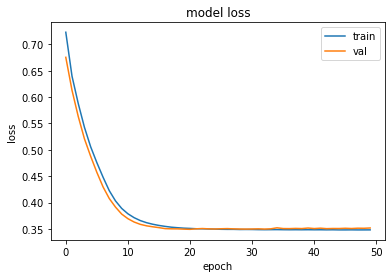

0.3966175317764282


In [266]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
# Evaluar el modelo en el conjunto de prueba
results = model.evaluate(X_test, y_test, verbose=0)[0]
print(results)

M3

In [267]:
df_m2 = df_sinnan.dropna()

In [269]:
# seleccionar las columnas que quiero usar como variables de entrada y como variable objetivo
X = df_m2.drop(columns='trombo')
y = df_m2['trombo']

sc = StandardScaler()
X = sc.fit_transform(X)

# Definimos el modelo
model = Sequential()
model.add(Dense(44, input_dim=87, activation='relu'))
model.add(Dense(1, activation='softmax'))

# Compilamos el modelo, especificando la función de pérdida y el optimizador
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo utilizando los datos de entrada y salida
history = model.fit(X, y,validation_split=0.2,epochs=50, batch_size=10)

Epoch 1/50
234/234 [==============================] - 1s 3ms/step - loss: 0.1997 - accuracy: 0.0389 - val_loss: 0.0187 - val_accuracy: 0.0239
Epoch 2/50
234/234 [==============================] - 1s 2ms/step - loss: 0.0137 - accuracy: 0.0389 - val_loss: 0.0058 - val_accuracy: 0.0239
Epoch 3/50
234/234 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.0389 - val_loss: 0.0030 - val_accuracy: 0.0239
Epoch 4/50
234/234 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.0389 - val_loss: 0.0018 - val_accuracy: 0.0239
Epoch 5/50
234/234 [==============================] - 1s 2ms/step - loss: 0.0018 - accuracy: 0.0389 - val_loss: 0.0012 - val_accuracy: 0.0239
Epoch 6/50
234/234 [==============================] - 1s 2ms/step - loss: 0.0012 - accuracy: 0.0389 - val_loss: 8.9634e-04 - val_accuracy: 0.0239
Epoch 7/50
234/234 [==============================] - 0s 2ms/step - loss: 8.7928e-04 - accuracy: 0.0389 - val_loss: 6.7853e-04 - val_accuracy: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


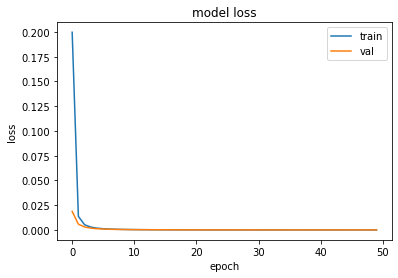

In [271]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

M4

In [279]:
seguido1 = np.arange(0,6,1)
seguido2 = np.arange(7,10,1)
seguido3 = np.arange(11,18,1)
seguido4 = np.arange(19,28,1)
seguido5 = np.arange(49,54,1)
seguido6 = np.arange(74,77,1)
c = np.concatenate((seguido1,seguido2,seguido3,seguido4,[34],[36],[39],[45],seguido5,[71],seguido6,[87]))
df = df_m2.iloc[:,c]

In [280]:
# seleccionar las columnas que quiero usar como variables de entrada y como variable objetivo
X = df.drop(columns='trombo')
y = df['trombo']

sc = StandardScaler()
X = sc.fit_transform(X)

# Definimos el modelo
model = Sequential()
model.add(Dense(20, input_dim=38, activation='relu'))
model.add(Dense(1, activation='softmax'))

# Compilamos el modelo, especificando la función de pérdida y el optimizador
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo utilizando los datos de entrada y salida
history = model.fit(X, y,validation_split=0.2,epochs=50, batch_size=10)

Epoch 1/50
234/234 [==============================] - 1s 3ms/step - loss: 0.9367 - accuracy: 0.0389 - val_loss: 0.4986 - val_accuracy: 0.0239
Epoch 2/50
234/234 [==============================] - 0s 2ms/step - loss: 0.3135 - accuracy: 0.0389 - val_loss: 0.1949 - val_accuracy: 0.0239
Epoch 3/50
234/234 [==============================] - 1s 2ms/step - loss: 0.1808 - accuracy: 0.0389 - val_loss: 0.1244 - val_accuracy: 0.0239
Epoch 4/50
234/234 [==============================] - 1s 3ms/step - loss: 0.1498 - accuracy: 0.0389 - val_loss: 0.1100 - val_accuracy: 0.0239
Epoch 5/50
234/234 [==============================] - 0s 2ms/step - loss: 0.1393 - accuracy: 0.0389 - val_loss: 0.1051 - val_accuracy: 0.0239
Epoch 6/50
234/234 [==============================] - 0s 2ms/step - loss: 0.1343 - accuracy: 0.0389 - val_loss: 0.1014 - val_accuracy: 0.0239
Epoch 7/50
234/234 [==============================] - 0s 2ms/step - loss: 0.1318 - accuracy: 0.0389 - val_loss: 0.1007 - val_accuracy: 0.0239
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


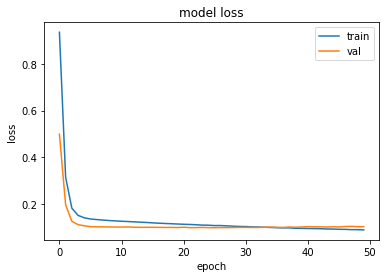

In [281]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

M5

In [282]:
# seleccionar las columnas que quiero usar como variables de entrada y como variable objetivo
X = df.drop(columns='trombo')
y = df['trombo']

sc = StandardScaler()
X = sc.fit_transform(X)

# Definimos el modelo
model = Sequential()
model.add(Dense(20, input_dim=38, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilamos el modelo, especificando la función de pérdida y el optimizador
model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo utilizando los datos de entrada y salida
history = model.fit(X, y,validation_split=0.2,epochs=50, batch_size=10)

Epoch 1/50
234/234 [==============================] - 2s 3ms/step - loss: 0.2009 - accuracy: 0.9363 - val_loss: 0.0674 - val_accuracy: 0.9761
Epoch 2/50
234/234 [==============================] - 1s 2ms/step - loss: 0.0605 - accuracy: 0.9611 - val_loss: 0.0340 - val_accuracy: 0.9761
Epoch 3/50
234/234 [==============================] - 1s 4ms/step - loss: 0.0457 - accuracy: 0.9611 - val_loss: 0.0284 - val_accuracy: 0.9761
Epoch 4/50
234/234 [==============================] - 1s 3ms/step - loss: 0.0421 - accuracy: 0.9611 - val_loss: 0.0264 - val_accuracy: 0.9761
Epoch 5/50
234/234 [==============================] - 0s 2ms/step - loss: 0.0406 - accuracy: 0.9615 - val_loss: 0.0255 - val_accuracy: 0.9761
Epoch 6/50
234/234 [==============================] - 1s 2ms/step - loss: 0.0398 - accuracy: 0.9615 - val_loss: 0.0251 - val_accuracy: 0.9761
Epoch 7/50
234/234 [==============================] - 1s 3ms/step - loss: 0.0394 - accuracy: 0.9615 - val_loss: 0.0247 - val_accuracy: 0.9761
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


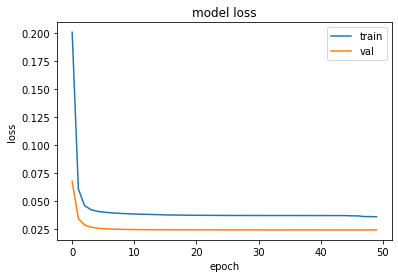

In [284]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

M6

In [289]:
# seleccionar las columnas que quiero usar como variables de entrada y como variable objetivo
X = df.drop(columns='trombo')
y = df['trombo']

df = df.sample(frac=1)
sc = StandardScaler()
X = sc.fit_transform(X)

# Definimos el modelo
model = Sequential()
model.add(Dense(20, input_dim=38, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilamos el modelo, especificando la función de pérdida y el optimizador
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo utilizando los datos de entrada y salida
history = model.fit(X, y,validation_split=0.33,epochs=10, batch_size=10)

Epoch 1/10
196/196 [==============================] - 1s 4ms/step - loss: 0.0863 - accuracy: 0.9070 - val_loss: 0.0266 - val_accuracy: 0.9762
Epoch 2/10
196/196 [==============================] - 0s 2ms/step - loss: 0.0407 - accuracy: 0.9581 - val_loss: 0.0232 - val_accuracy: 0.9762
Epoch 3/10
196/196 [==============================] - 1s 3ms/step - loss: 0.0395 - accuracy: 0.9581 - val_loss: 0.0225 - val_accuracy: 0.9762
Epoch 4/10
196/196 [==============================] - 0s 2ms/step - loss: 0.0384 - accuracy: 0.9581 - val_loss: 0.0226 - val_accuracy: 0.9762
Epoch 5/10
196/196 [==============================] - 0s 2ms/step - loss: 0.0374 - accuracy: 0.9581 - val_loss: 0.0227 - val_accuracy: 0.9762
Epoch 6/10
196/196 [==============================] - 0s 2ms/step - loss: 0.0361 - accuracy: 0.9581 - val_loss: 0.0231 - val_accuracy: 0.9762
Epoch 7/10
196/196 [==============================] - 0s 2ms/step - loss: 0.0351 - accuracy: 0.9591 - val_loss: 0.0231 - val_accuracy: 0.9751
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


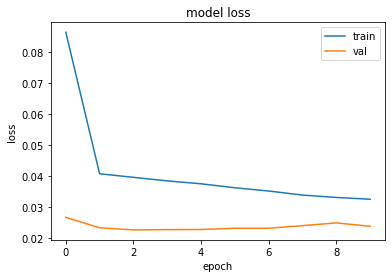

In [290]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

M7

In [292]:
# seleccionar las columnas que quiero usar como variables de entrada y como variable objetivo
X = df.drop(columns='trombo')
y = df['trombo']

df = df.sample(frac=1)
sc = StandardScaler()
X = sc.fit_transform(X)

# Definimos el modelo
model = Sequential()
model.add(Dense(50, input_dim=38, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilamos el modelo, especificando la función de pérdida y el optimizador
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo utilizando los datos de entrada y salida
history = model.fit(X, y,validation_split=0.33,epochs=10, batch_size=10)

Epoch 1/10
196/196 [==============================] - 1s 3ms/step - loss: 0.1203 - accuracy: 0.8483 - val_loss: 0.0484 - val_accuracy: 0.9544
Epoch 2/10
196/196 [==============================] - 0s 2ms/step - loss: 0.0346 - accuracy: 0.9642 - val_loss: 0.0411 - val_accuracy: 0.9565
Epoch 3/10
196/196 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 0.9663 - val_loss: 0.0401 - val_accuracy: 0.9565
Epoch 4/10
196/196 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 0.9673 - val_loss: 0.0393 - val_accuracy: 0.9565
Epoch 5/10
196/196 [==============================] - 0s 2ms/step - loss: 0.0283 - accuracy: 0.9668 - val_loss: 0.0388 - val_accuracy: 0.9575
Epoch 6/10
196/196 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 0.9678 - val_loss: 0.0388 - val_accuracy: 0.9575
Epoch 7/10
196/196 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9678 - val_loss: 0.0386 - val_accuracy: 0.9575
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


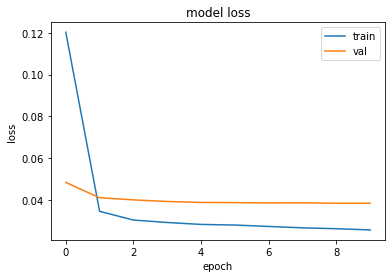

In [293]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

Ma1

In [301]:
# seleccionar las columnas que quiero usar como variables de entrada y como variable objetivo
X = df.drop(columns='trombo')
y = df['trombo']

df = df.sample(frac=1)
sc = StandardScaler()
X = sc.fit_transform(X)

# Definimos el modelo
model = Sequential()
model.add(Dense(20, input_dim=38, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilamos el modelo, especificando la función de pérdida y el optimizador
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo utilizando los datos de entrada y salida
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X, y,validation_split=0.3,epochs=50, batch_size=10,callbacks=[callback])

Epoch 1/50
205/205 [==============================] - 3s 7ms/step - loss: 0.0597 - accuracy: 0.9531 - val_loss: 0.0429 - val_accuracy: 0.9578
Epoch 2/50
205/205 [==============================] - 1s 4ms/step - loss: 0.0342 - accuracy: 0.9653 - val_loss: 0.0383 - val_accuracy: 0.9590
Epoch 3/50
205/205 [==============================] - 1s 4ms/step - loss: 0.0316 - accuracy: 0.9658 - val_loss: 0.0376 - val_accuracy: 0.9590
Epoch 4/50
205/205 [==============================] - 1s 6ms/step - loss: 0.0303 - accuracy: 0.9668 - val_loss: 0.0374 - val_accuracy: 0.9578
Epoch 5/50
205/205 [==============================] - 1s 4ms/step - loss: 0.0294 - accuracy: 0.9673 - val_loss: 0.0374 - val_accuracy: 0.9555
Epoch 6/50
205/205 [==============================] - 1s 4ms/step - loss: 0.0287 - accuracy: 0.9687 - val_loss: 0.0376 - val_accuracy: 0.9567
Epoch 7/50
205/205 [==============================] - 1s 5ms/step - loss: 0.0280 - accuracy: 0.9697 - val_loss: 0.0378 - val_accuracy: 0.9578
Epoch 

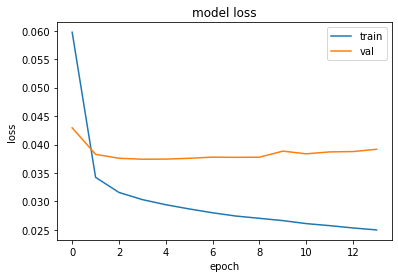

In [302]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

M2a

In [303]:
# seleccionar las columnas que quiero usar como variables de entrada y como variable objetivo
X = df.drop(columns='trombo')
y = df['trombo']

df = df.sample(frac=1)
sc = StandardScaler()
X = sc.fit_transform(X)

# Definimos el modelo
model = Sequential()
model.add(Dense(26, input_dim=38, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilamos el modelo, especificando la función de pérdida y el optimizador
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo utilizando los datos de entrada y salida
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X, y,validation_split=0.3,epochs=50, batch_size=10,callbacks=[callback])

Epoch 1/50
205/205 [==============================] - 10s 5ms/step - loss: 0.1200 - accuracy: 0.8587 - val_loss: 0.0515 - val_accuracy: 0.9555
Epoch 2/50
205/205 [==============================] - 1s 3ms/step - loss: 0.0442 - accuracy: 0.9570 - val_loss: 0.0398 - val_accuracy: 0.9601
Epoch 3/50
205/205 [==============================] - 1s 3ms/step - loss: 0.0398 - accuracy: 0.9570 - val_loss: 0.0381 - val_accuracy: 0.9612
Epoch 4/50
205/205 [==============================] - 1s 3ms/step - loss: 0.0378 - accuracy: 0.9589 - val_loss: 0.0370 - val_accuracy: 0.9612
Epoch 5/50
205/205 [==============================] - 1s 4ms/step - loss: 0.0365 - accuracy: 0.9585 - val_loss: 0.0362 - val_accuracy: 0.9612
Epoch 6/50
205/205 [==============================] - 1s 3ms/step - loss: 0.0356 - accuracy: 0.9604 - val_loss: 0.0360 - val_accuracy: 0.9612
Epoch 7/50
205/205 [==============================] - 1s 3ms/step - loss: 0.0346 - accuracy: 0.9599 - val_loss: 0.0335 - val_accuracy: 0.9612
Epoch

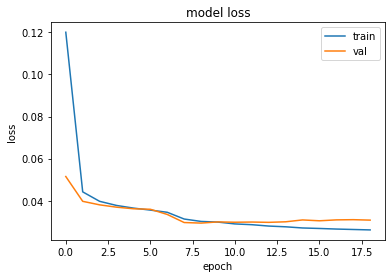

In [304]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

m3a

In [305]:
# seleccionar las columnas que quiero usar como variables de entrada y como variable objetivo
X = df.drop(columns='trombo')
y = df['trombo']

df = df.sample(frac=1)
sc = StandardScaler()
X = sc.fit_transform(X)

# Definimos el modelo
model = Sequential()
model.add(Dense(75, input_dim=38, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilamos el modelo, especificando la función de pérdida y el optimizador
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo utilizando los datos de entrada y salida
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X, y,validation_split=0.3,epochs=50, batch_size=10,callbacks=[callback])

Epoch 1/50
205/205 [==============================] - 2s 4ms/step - loss: 0.0698 - accuracy: 0.9286 - val_loss: 0.0373 - val_accuracy: 0.9601
Epoch 2/50
205/205 [==============================] - 1s 3ms/step - loss: 0.0328 - accuracy: 0.9648 - val_loss: 0.0345 - val_accuracy: 0.9612
Epoch 3/50
205/205 [==============================] - 1s 3ms/step - loss: 0.0310 - accuracy: 0.9648 - val_loss: 0.0341 - val_accuracy: 0.9612
Epoch 4/50
205/205 [==============================] - 1s 3ms/step - loss: 0.0299 - accuracy: 0.9653 - val_loss: 0.0341 - val_accuracy: 0.9612
Epoch 5/50
205/205 [==============================] - 1s 3ms/step - loss: 0.0289 - accuracy: 0.9668 - val_loss: 0.0357 - val_accuracy: 0.9601
Epoch 6/50
205/205 [==============================] - 1s 3ms/step - loss: 0.0285 - accuracy: 0.9658 - val_loss: 0.0352 - val_accuracy: 0.9590
Epoch 7/50
205/205 [==============================] - 1s 2ms/step - loss: 0.0276 - accuracy: 0.9663 - val_loss: 0.0364 - val_accuracy: 0.9601
Epoch 

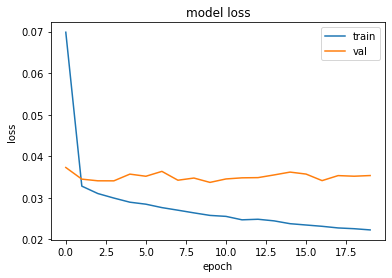

In [306]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

m4a

In [307]:
# seleccionar las columnas que quiero usar como variables de entrada y como variable objetivo
X = df.drop(columns='trombo')
y = df['trombo']

df = df.sample(frac=1)
sc = StandardScaler()
X = sc.fit_transform(X)

# Definimos el modelo
model = Sequential()
model.add(Dense(20, input_dim=38, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilamos el modelo, especificando la función de pérdida y el optimizador
model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo utilizando los datos de entrada y salida
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X, y,validation_split=0.3,epochs=50, batch_size=10,callbacks=[callback])

Epoch 1/50
205/205 [==============================] - 3s 6ms/step - loss: 0.2010 - accuracy: 0.9262 - val_loss: 0.0841 - val_accuracy: 0.9635
Epoch 2/50
205/205 [==============================] - 1s 4ms/step - loss: 0.0627 - accuracy: 0.9619 - val_loss: 0.0459 - val_accuracy: 0.9669
Epoch 3/50
205/205 [==============================] - 1s 4ms/step - loss: 0.0452 - accuracy: 0.9629 - val_loss: 0.0390 - val_accuracy: 0.9669
Epoch 4/50
205/205 [==============================] - 1s 5ms/step - loss: 0.0411 - accuracy: 0.9629 - val_loss: 0.0365 - val_accuracy: 0.9669
Epoch 5/50
205/205 [==============================] - 1s 5ms/step - loss: 0.0395 - accuracy: 0.9629 - val_loss: 0.0353 - val_accuracy: 0.9669
Epoch 6/50
205/205 [==============================] - 1s 4ms/step - loss: 0.0387 - accuracy: 0.9629 - val_loss: 0.0347 - val_accuracy: 0.9669
Epoch 7/50
205/205 [==============================] - 1s 3ms/step - loss: 0.0382 - accuracy: 0.9629 - val_loss: 0.0343 - val_accuracy: 0.9669
Epoch 

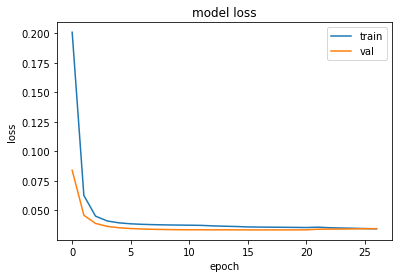

In [308]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

m5a

In [309]:
# seleccionar las columnas que quiero usar como variables de entrada y como variable objetivo
X = df.drop(columns='trombo')
y = df['trombo']

df = df.sample(frac=1)
sc = StandardScaler()
X = sc.fit_transform(X)

# Definimos el modelo
model = Sequential()
model.add(Dense(26, input_dim=38, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilamos el modelo, especificando la función de pérdida y el optimizador
model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo utilizando los datos de entrada y salida
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X, y,validation_split=0.3,epochs=50, batch_size=10,callbacks=[callback])

Epoch 1/50
205/205 [==============================] - 3s 7ms/step - loss: 0.3026 - accuracy: 0.8172 - val_loss: 0.1189 - val_accuracy: 0.9590
Epoch 2/50
205/205 [==============================] - 1s 3ms/step - loss: 0.0769 - accuracy: 0.9614 - val_loss: 0.0527 - val_accuracy: 0.9692
Epoch 3/50
205/205 [==============================] - 1s 3ms/step - loss: 0.0494 - accuracy: 0.9619 - val_loss: 0.0404 - val_accuracy: 0.9681
Epoch 4/50
205/205 [==============================] - 1s 3ms/step - loss: 0.0428 - accuracy: 0.9629 - val_loss: 0.0366 - val_accuracy: 0.9681
Epoch 5/50
205/205 [==============================] - 1s 3ms/step - loss: 0.0404 - accuracy: 0.9629 - val_loss: 0.0349 - val_accuracy: 0.9681
Epoch 6/50
205/205 [==============================] - 1s 4ms/step - loss: 0.0392 - accuracy: 0.9629 - val_loss: 0.0340 - val_accuracy: 0.9681
Epoch 7/50
205/205 [==============================] - 1s 6ms/step - loss: 0.0385 - accuracy: 0.9629 - val_loss: 0.0336 - val_accuracy: 0.9681
Epoch 

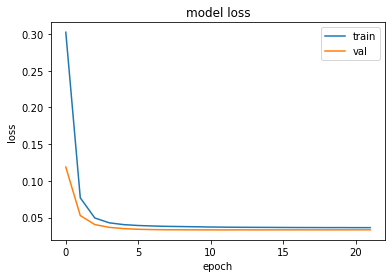

In [310]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

m6a

In [311]:
# seleccionar las columnas que quiero usar como variables de entrada y como variable objetivo
X = df.drop(columns='trombo')
y = df['trombo']

df = df.sample(frac=1)
sc = StandardScaler()
X = sc.fit_transform(X)

# Definimos el modelo
model = Sequential()
model.add(Dense(75, input_dim=38, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilamos el modelo, especificando la función de pérdida y el optimizador
model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo utilizando los datos de entrada y salida
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X, y,validation_split=0.3,epochs=50, batch_size=10,callbacks=[callback])

Epoch 1/50
205/205 [==============================] - 2s 5ms/step - loss: 0.1546 - accuracy: 0.9208 - val_loss: 0.0466 - val_accuracy: 0.9681
Epoch 2/50
205/205 [==============================] - 1s 3ms/step - loss: 0.0445 - accuracy: 0.9624 - val_loss: 0.0362 - val_accuracy: 0.9669
Epoch 3/50
205/205 [==============================] - 1s 3ms/step - loss: 0.0396 - accuracy: 0.9629 - val_loss: 0.0346 - val_accuracy: 0.9658
Epoch 4/50
205/205 [==============================] - 1s 3ms/step - loss: 0.0381 - accuracy: 0.9633 - val_loss: 0.0341 - val_accuracy: 0.9658
Epoch 5/50
205/205 [==============================] - 1s 3ms/step - loss: 0.0374 - accuracy: 0.9638 - val_loss: 0.0339 - val_accuracy: 0.9669
Epoch 6/50
205/205 [==============================] - 1s 3ms/step - loss: 0.0370 - accuracy: 0.9638 - val_loss: 0.0337 - val_accuracy: 0.9669
Epoch 7/50
205/205 [==============================] - 1s 3ms/step - loss: 0.0367 - accuracy: 0.9638 - val_loss: 0.0336 - val_accuracy: 0.9669
Epoch 

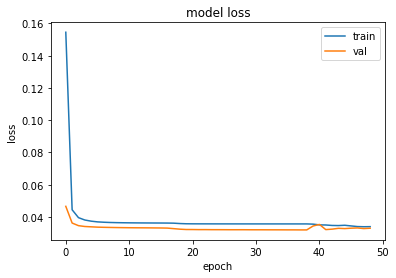

In [312]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

m7a

In [313]:
# seleccionar las columnas que quiero usar como variables de entrada y como variable objetivo
X = df.drop(columns='trombo')
y = df['trombo']

df = df.sample(frac=1)
sc = StandardScaler()
X = sc.fit_transform(X)

# Definimos el modelo
model = Sequential()
model.add(Dense(20, input_dim=38, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilamos el modelo, especificando la función de pérdida y el optimizador
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo utilizando los datos de entrada y salida
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X, y,validation_split=0.3,epochs=50, batch_size=10,callbacks=[callback])

Epoch 1/50
205/205 [==============================] - 3s 5ms/step - loss: 0.3147 - accuracy: 0.9257 - val_loss: 0.1820 - val_accuracy: 0.9590
Epoch 2/50
205/205 [==============================] - 1s 3ms/step - loss: 0.1529 - accuracy: 0.9619 - val_loss: 0.1520 - val_accuracy: 0.9601
Epoch 3/50
205/205 [==============================] - 1s 4ms/step - loss: 0.1333 - accuracy: 0.9643 - val_loss: 0.1501 - val_accuracy: 0.9578
Epoch 4/50
205/205 [==============================] - 1s 3ms/step - loss: 0.1248 - accuracy: 0.9638 - val_loss: 0.1468 - val_accuracy: 0.9601
Epoch 5/50
205/205 [==============================] - 1s 3ms/step - loss: 0.1195 - accuracy: 0.9653 - val_loss: 0.1476 - val_accuracy: 0.9590
Epoch 6/50
205/205 [==============================] - 1s 5ms/step - loss: 0.1156 - accuracy: 0.9663 - val_loss: 0.1496 - val_accuracy: 0.9590
Epoch 7/50
205/205 [==============================] - 1s 6ms/step - loss: 0.1123 - accuracy: 0.9677 - val_loss: 0.1493 - val_accuracy: 0.9590
Epoch 

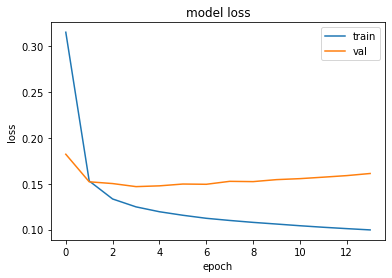

In [314]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

m8a

In [315]:
# seleccionar las columnas que quiero usar como variables de entrada y como variable objetivo
X = df.drop(columns='trombo')
y = df['trombo']

df = df.sample(frac=1)
sc = StandardScaler()
X = sc.fit_transform(X)

# Definimos el modelo
model = Sequential()
model.add(Dense(26, input_dim=38, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilamos el modelo, especificando la función de pérdida y el optimizador
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo utilizando los datos de entrada y salida
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X, y,validation_split=0.3,epochs=50, batch_size=10,callbacks=[callback])

Epoch 1/50
205/205 [==============================] - 2s 4ms/step - loss: 0.3449 - accuracy: 0.9169 - val_loss: 0.2093 - val_accuracy: 0.9567
Epoch 2/50
205/205 [==============================] - 1s 3ms/step - loss: 0.1577 - accuracy: 0.9663 - val_loss: 0.1641 - val_accuracy: 0.9578
Epoch 3/50
205/205 [==============================] - 1s 3ms/step - loss: 0.1336 - accuracy: 0.9658 - val_loss: 0.1531 - val_accuracy: 0.9590
Epoch 4/50
205/205 [==============================] - 1s 3ms/step - loss: 0.1247 - accuracy: 0.9673 - val_loss: 0.1510 - val_accuracy: 0.9601
Epoch 5/50
205/205 [==============================] - 1s 3ms/step - loss: 0.1191 - accuracy: 0.9668 - val_loss: 0.1493 - val_accuracy: 0.9578
Epoch 6/50
205/205 [==============================] - 1s 3ms/step - loss: 0.1153 - accuracy: 0.9673 - val_loss: 0.1514 - val_accuracy: 0.9578
Epoch 7/50
205/205 [==============================] - 1s 3ms/step - loss: 0.1122 - accuracy: 0.9682 - val_loss: 0.1516 - val_accuracy: 0.9578
Epoch 

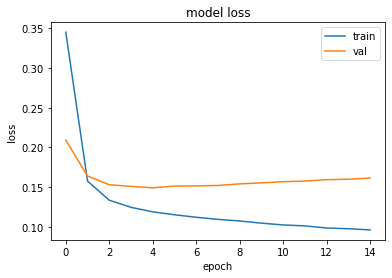

In [316]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

m9a

In [317]:
# seleccionar las columnas que quiero usar como variables de entrada y como variable objetivo
X = df.drop(columns='trombo')
y = df['trombo']

df = df.sample(frac=1)
sc = StandardScaler()
X = sc.fit_transform(X)

# Definimos el modelo
model = Sequential()
model.add(Dense(75, input_dim=38, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilamos el modelo, especificando la función de pérdida y el optimizador
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo utilizando los datos de entrada y salida
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X, y,validation_split=0.3,epochs=50, batch_size=10,callbacks=[callback])

Epoch 1/50
205/205 [==============================] - 2s 4ms/step - loss: 0.2454 - accuracy: 0.9448 - val_loss: 0.1244 - val_accuracy: 0.9715
Epoch 2/50
205/205 [==============================] - 1s 2ms/step - loss: 0.1470 - accuracy: 0.9614 - val_loss: 0.1161 - val_accuracy: 0.9715
Epoch 3/50
205/205 [==============================] - 1s 3ms/step - loss: 0.1341 - accuracy: 0.9619 - val_loss: 0.1142 - val_accuracy: 0.9715
Epoch 4/50
205/205 [==============================] - 1s 3ms/step - loss: 0.1290 - accuracy: 0.9624 - val_loss: 0.1138 - val_accuracy: 0.9704
Epoch 5/50
205/205 [==============================] - 1s 3ms/step - loss: 0.1248 - accuracy: 0.9614 - val_loss: 0.1150 - val_accuracy: 0.9692
Epoch 6/50
205/205 [==============================] - 0s 2ms/step - loss: 0.1188 - accuracy: 0.9619 - val_loss: 0.1170 - val_accuracy: 0.9704
Epoch 7/50
205/205 [==============================] - 1s 3ms/step - loss: 0.1160 - accuracy: 0.9619 - val_loss: 0.1173 - val_accuracy: 0.9692
Epoch 

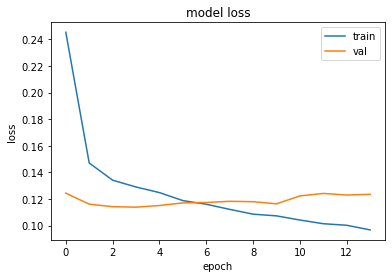

In [318]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

prueba sigmoid

In [325]:
# seleccionar las columnas que quiero usar como variables de entrada y como variable objetivo
X = df.drop(columns='trombo')
y = df['trombo']

df = df.sample(frac=1)
sc = StandardScaler()
X = sc.fit_transform(X)

# Definimos el modelo
model = Sequential()
model.add(Dense(26, input_dim=38, activation='relu'))
model.add(Dense(26, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilamos el modelo, especificando la función de pérdida y el optimizador
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo utilizando los datos de entrada y salida
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X, y,validation_split=0.3,epochs=50, batch_size=10,callbacks=[callback])

Epoch 1/50
205/205 [==============================] - 1s 4ms/step - loss: 0.0721 - accuracy: 0.9321 - val_loss: 0.0368 - val_accuracy: 0.9612
Epoch 2/50
205/205 [==============================] - 0s 2ms/step - loss: 0.0332 - accuracy: 0.9653 - val_loss: 0.0360 - val_accuracy: 0.9612
Epoch 3/50
205/205 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.9653 - val_loss: 0.0358 - val_accuracy: 0.9612
Epoch 4/50
205/205 [==============================] - 1s 3ms/step - loss: 0.0299 - accuracy: 0.9653 - val_loss: 0.0359 - val_accuracy: 0.9612
Epoch 5/50
205/205 [==============================] - 1s 3ms/step - loss: 0.0290 - accuracy: 0.9673 - val_loss: 0.0360 - val_accuracy: 0.9612
Epoch 6/50
205/205 [==============================] - 1s 2ms/step - loss: 0.0279 - accuracy: 0.9677 - val_loss: 0.0362 - val_accuracy: 0.9612
Epoch 7/50
205/205 [==============================] - 1s 4ms/step - loss: 0.0271 - accuracy: 0.9687 - val_loss: 0.0367 - val_accuracy: 0.9578
Epoch 

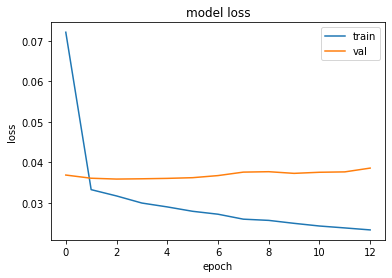

In [326]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()